In [49]:
#importing librabies
# import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score

In [50]:
#loading the data from csv file to pandas dataframe
song_data = pd.read_csv('tracks_features.csv', nrows=1000)


In [51]:
#first 5 rows
# song_data.head()

In [52]:
song_data.shape

(1000, 24)

In [53]:
#missing values
# song_data.isnull().sum()

In [54]:
song_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                1000 non-null   object 
 1   name              1000 non-null   object 
 2   album             1000 non-null   object 
 3   album_id          1000 non-null   object 
 4   artists           1000 non-null   object 
 5   artist_ids        1000 non-null   object 
 6   track_number      1000 non-null   int64  
 7   disc_number       1000 non-null   int64  
 8   explicit          1000 non-null   bool   
 9   danceability      1000 non-null   float64
 10  energy            1000 non-null   float64
 11  key               1000 non-null   int64  
 12  loudness          1000 non-null   float64
 13  mode              1000 non-null   int64  
 14  speechiness       1000 non-null   float64
 15  acousticness      1000 non-null   float64
 16  instrumentalness  1000 non-null   float64
 

In [55]:
X = song_data.iloc[:, [9,10,11,12,14,15,17,18,19]].values
X.shape

(1000, 9)

In [56]:
# print(X)

In [57]:
#Elbow method to find the optimal number of clusters
wcss = []
iter = []
db_score = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters = i, n_init="auto", init = 'k-means++',random_state=41)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    iter.append(kmeans.n_iter_)
    db_score.append(davies_bouldin_score(X, kmeans.labels_))

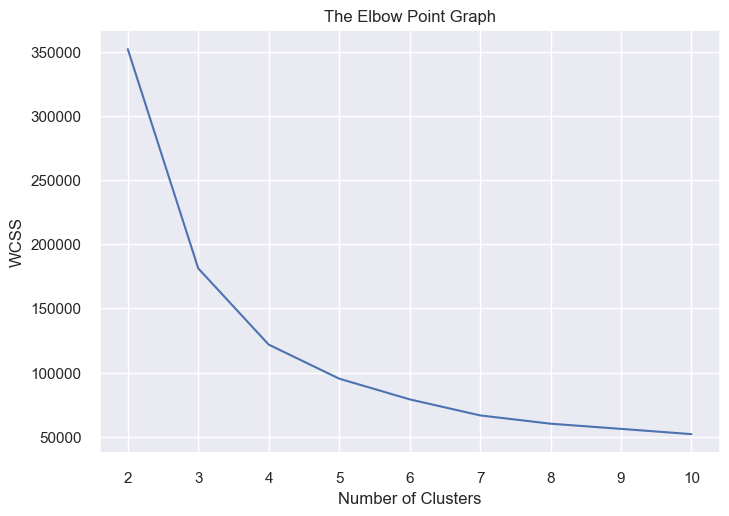

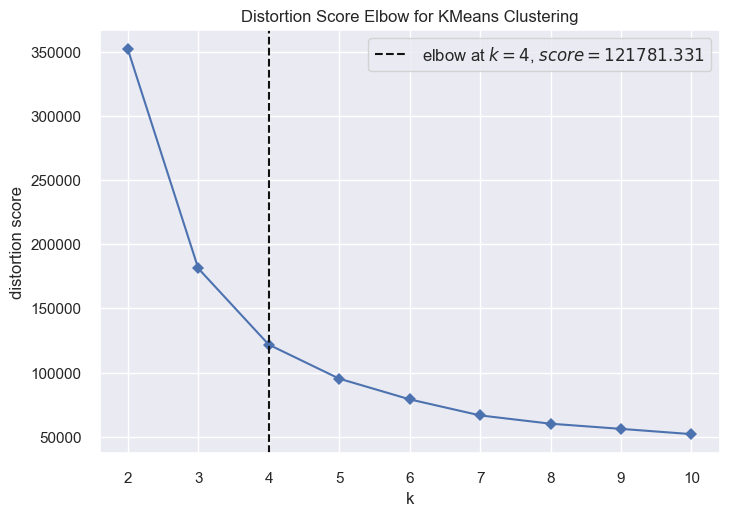

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [58]:
# plot an elbow graph

sns.set()
plt.plot(range(2,11), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# plt.plot(range(2,11), iter)
# plt.title('The # iteration')
# plt.xlabel('Number of Clusters')
# plt.ylabel('Iterations')
# plt.show()

# plt.plot(range(2,11), db_score)
# plt.title('The Davies Bouldin Score')
# plt.xlabel('Number of Clusters')
# plt.ylabel('DB Score')
# plt.show()

from yellowbrick.cluster import KElbowVisualizer
# k is range of number of clusters.
visualizer = KElbowVisualizer(kmeans, k=(2,11), timings=False)
# Fit data to visualizer
visualizer.fit(X)
# Finalize and render figure
visualizer.show()

Optimum clusters = 4
Training k-means Clustering model       

In [59]:
kmeans = KMeans(n_clusters = 4, n_init="auto", init = 'k-means++',random_state=41)

#return a label for each data point based on their cluster
Y = kmeans.fit_predict(X)

print(Y)

[0 0 2 3 2 2 3 1 3 3 2 3 2 3 0 3 1 0 1 2 2 0 0 3 0 3 0 0 3 0 1 3 2 1 3 0 3
 3 3 3 0 0 3 3 3 0 1 1 0 1 2 0 3 0 3 3 2 2 1 0 2 0 0 1 2 2 3 2 0 2 0 0 1 0
 3 2 2 2 2 0 0 3 2 0 0 2 0 2 2 3 2 1 1 3 2 2 2 0 0 0 0 2 0 0 2 3 0 0 3 3 1
 3 0 2 0 0 0 0 2 3 3 3 3 2 0 2 0 0 1 2 3 3 3 0 0 3 3 0 3 3 3 3 0 2 3 2 1 2
 2 3 2 0 2 3 0 1 2 0 2 3 2 0 3 2 0 2 0 2 3 0 0 2 2 3 0 2 3 0 2 0 0 0 0 0 0
 0 3 0 0 3 0 3 0 2 0 1 3 3 2 1 0 2 1 3 0 1 1 2 1 0 2 2 0 2 2 0 0 3 1 3 3 2
 1 1 3 3 3 0 0 0 0 0 3 3 1 3 0 2 0 3 3 2 0 2 0 0 3 0 0 0 3 1 0 2 2 1 3 3 0
 0 3 2 3 3 3 3 0 3 3 0 1 0 3 0 3 2 2 0 0 0 1 2 1 3 0 0 3 0 0 0 3 2 0 3 0 0
 0 0 2 0 2 3 1 3 2 2 3 0 2 2 2 2 2 2 2 2 2 2 0 2 2 0 0 0 2 0 0 0 0 0 1 1 2
 1 1 3 2 1 0 2 3 1 2 2 0 1 0 0 1 2 1 1 0 2 1 0 2 0 2 2 3 2 2 3 2 2 2 3 2 2
 0 2 2 0 1 0 0 2 1 3 0 2 1 3 3 0 3 3 3 0 1 2 0 0 0 2 0 3 1 2 0 2 2 1 2 1 0
 0 3 3 0 0 3 3 3 3 1 0 3 3 3 1 3 1 3 3 1 0 2 2 2 2 1 2 0 1 2 3 2 3 3 0 3 3
 3 2 2 2 2 3 3 1 1 3 0 0 3 2 0 0 2 0 2 0 0 3 2 2 0 0 1 2 2 0 1 0 2 0 0 2 0
 2 2 3 2 0 0 0 0 3 2 2 2 

Visualizing all the clusters

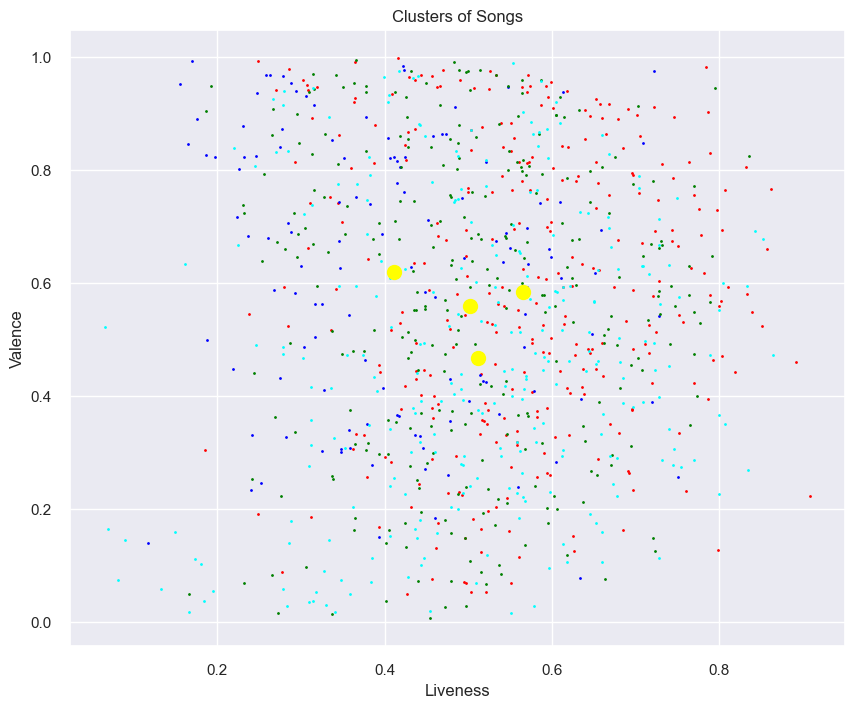

In [60]:
# plotting all the clusters and their centroids
plt.figure(figsize=(10, 8))
plt.scatter(X[Y == 0, 0], X[Y == 0, 1], s = 1, c = 'red', label = 'Cluster 1')
plt.scatter(X[Y == 1, 0], X[Y == 1, 1], s = 1, c = 'blue', label = 'Cluster 2')
plt.scatter(X[Y == 2, 0], X[Y == 2, 1], s = 1, c = 'green', label = 'Cluster 3')
plt.scatter(X[Y == 3, 0], X[Y == 3, 1], s = 1, c = 'cyan', label = 'Cluster 4')

#plotting centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'yellow', label = 'Centroids')
plt.title('Clusters of Songs')
plt.xlabel('Liveness')
plt.ylabel('Valence')
plt.show()


Davies-Boudin Index


In [61]:
labels = kmeans.labels_
davies_bouldin_score(X, Y)

0.6871798480420269

Sillhouette

In [62]:
silhouette_score(X, Y)


0.44267190295758985